# Data Wrangling
## Lesson 2, Dealing with Dirty Data

In this assignment, you'll be implementing techniques for cleaning up "dirty data."

Dirty data consists of inconsistencies in the data such as missing values that will lead to certain functions crashing or misleading data, thus why it is important we use techniques for making the data more readable and understandable before doing certain analyses. In short, any data that takes away from the "data integrity" of a dataset is considered dirty data.

There are other examples, for instance in the business world, such as data collected using the wrong method, from the wrong population, and inaccurate data, for example a small mistake in a customer address. We will not look at those because there is no way for us to identify and pinpoint these errors. Most significant dirty data comes from these errors, but the cleaning that we do is still an integral part, as it is said to take up 80% of a data scientist's time.

## Getting started
There are some common issues with datasets that we will be looking at. These include (but are not limited to) missing values, units, duplicate data, having values that don't fall within a specified range, redundant data, data with different columns for the same data points but just in different units, and misspelled data (add), and (possibly) how to clean excessively large datasets (also, pd.read_csv only works for files less than 25 MB - how to overome this problem?) -> might instead just take random sample and clean that instead.

If you think of or come across any other examples not covered in this lesson, please contact either a TA, the course instructor, or your graduate school/PhD advisor and we will discuss what strategies might be implemented for such data.
(how to format code for this?)

Use the ncaa dataset in your dataset folder.

Read your data into a dataframe:

# Missing Values

Handling dirty data can be tricky. When evaluating how to handle missing or na values, one can consider the following:

    - Remove entire row if any value is missing
    - Remove entire row if multiple values are missing
    - Fill in the n/a or missing value with the average or median of the data set
    
These are just a few solutions to cleaning missing values, however each data set's solution may look different. When cleaning data it is important to document how you handled cleaning the data, so that others can reproduce your work and you can remove honest about any data modifications.

Also when cleaning data make sure that you don't add bias or change the dataset beyond recognition. Take for example a data set where one of the fields is what time people eat dinner. Through mindlessly removing all rows that have eranious values for columns, you may neglect the fact that elderly people tend to have a higher tendancy to produce eranious data. Now your data-set may be transformed to the point where you have removed almost all rows that contain people eating the early-bird special.

For practice try the following: remove the entire row from our dataframe if any value in the row is missing

In [ ]:
data = data.dropna(how = 'any')

Now try dropping the entire row if all values in the row are missing

## Non-standard types of missing values

On top of missing values, your data set can sometimes include textual missing values. These can include, but are far from limited to: 
 - n/a
 - na
 - '--'
 
List some of the different types of textual missing values that exist in our NCAA dataset.

**Tip:** Try using some of these methods and figuring out exactly what they do to get a better picture of your dataset.

 - .info()
 - .isnull()
 - .isnull().any()
 - .isnull().sum()

Re-read in the data and include these missing values as your 'na_values':

## Replacing missing values

Use .fillna() to replace missing values. It is common practice to either fill the missing values with 0, hot-deck, cold-deck, mean substitution, regression, and multiple imputation. Check out this [wikipedia article](https://en.wikipedia.org/wiki/Imputation_(statistics)) on it. Which is best? What do you do if its a string?

Please choose of the following replacement options and put them to use for the NCAA dataset.

Replace with 0:

Hot-deck:

In [1]:
data_to_list = data['column'].tolist()
random_point = random.choice(data_to_list)
if(random_point != 0 and random_point.isNaN() and random_point != na_values):
    data['column'] = data['column'].fillna(random_point)

SyntaxError: unexpected EOF while parsing (<ipython-input-1-478e0c2056a5>, line 3)

Cold-deck - select a random point from another dataset (similar to above):

Mean substitution:

Median substitution:

Regression (Perform linear or logistic regression on another column and use that to predict what the value in this column would be):



Multiple imputation:

In [ ]:
import statsmodels.imputation.mice as mice
from fancyimpute import MICE
data_cols = list(data)
data = pd.DataFrame(MICE(verbose=False).complete(data))
data.columns = data_cols

KNN can also be used, but it becomes inefficient with large datasets, so we will ignore it

# Duplicate Data

Duplicate data occurs when there are two rows that have all of the same column values

use .duplicated() on dataframe to return boolean series with true for each duplicated row:

Now remove duplicated data:

**Tip:** There is a library function for this, try finding it online.

# Values that don't fall within a specified range

Decide if there are columns that should have only a certain range of values and apply any of the above methods for "replacing missing values" for any values that don't fall within that range:

# Redundant Data

Redundant data occurs when there is a data point that is repeated that could have been deduced from another data point.

An example is shown below:

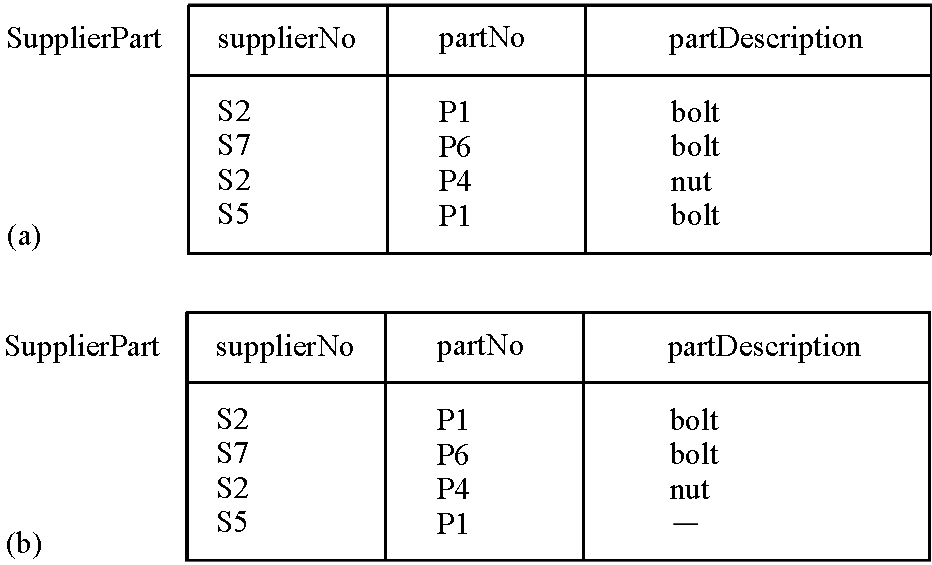

In [20]:
from IPython.display import Image
Image("img/redundant_data.jpg")

Find unique values:

Slice the columns that are redundant:

# Data with different columns for same variable, but in different units:

Slice the column with the non-standard units